In [2]:
## Data Set #10: Diabetes Prediction
This data set is from Kaggle. https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

**Description:**

"The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes."

### Data Cleaning Issues:

While there are no missing values, the gender and smoking history columns needs to be converted to a numbers to model.

### Possible Hypotheses:
This data set is a good candidate for k-mean clustering to predict the whether a patient has diabetes. One could also explore correlation between fields, look at differences by gender, smoking history, etc.



SyntaxError: invalid syntax (3249065790.py, line 2)

In [3]:
import numpy as np
import pandas as pd
from datascience import *
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
url = 'data/diabetes_prediction_dataset.csv'
diabetes = Table.read_table(url)
diabetes.show(3)

gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
Female,80,0,1,never,25.19,6.6,140,0
Female,54,0,0,No Info,27.32,6.6,80,0
Male,28,0,0,never,27.32,5.7,158,0


In [5]:
diabetes.stats()

statistic,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
min,Female,0.08,0,0,No Info,10.01,3.5,80,0
max,Other,80,1,1,not current,95.69,9,300,1
median,,43,0,0,,27.32,5.8,140,0
sum,,4.18859e+06,7485,3942,,2.73208e+06,552751,1.38058e+07,8500


In [6]:
np.unique(diabetes['smoking_history'])

array(['No Info', 'current', 'ever', 'former', 'never', 'not current'],
      dtype='<U11')

In [7]:
diabetes_hd = diabetes.where("heart_disease", are.equal_to(1))
diabetes_hd

gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
Female,80,0,1,never,25.19,6.6,140,0
Male,76,1,1,current,20.14,4.8,155,0
Female,72,0,1,former,27.94,6.5,130,0
Male,67,0,1,not current,27.32,6.5,200,1
Female,77,1,1,never,32.02,5,159,0
Female,59,0,1,ever,23.11,6.5,200,0
Male,68,1,1,current,27.32,5,126,0
Male,59,0,1,ever,30.85,5,126,0
Female,80,0,1,never,29.59,5.8,158,0
Male,57,1,1,not current,27.77,6.6,160,1


In [8]:
diabetes_hdbgl = diabetes_hd.where("blood_glucose_level", are.above(150))
diabetes_hdbgl

gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
Male,76,1,1,current,20.14,4.8,155,0
Male,67,0,1,not current,27.32,6.5,200,1
Female,77,1,1,never,32.02,5,159,0
Female,59,0,1,ever,23.11,6.5,200,0
Female,80,0,1,never,29.59,5.8,158,0
Male,57,1,1,not current,27.77,6.6,160,1
Female,80,0,1,former,21.3,5,159,0
Male,80,0,1,former,24.36,7.5,280,1
Female,69,0,1,never,32.27,6.2,160,0
Male,75,0,1,not current,28.12,7.5,160,1


In [9]:
diabtetes_hdbgl = diabetes_hd.where("blood_glucose_level", are.above(140))
diabetes_hdbgl

gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
Male,76,1,1,current,20.14,4.8,155,0
Male,67,0,1,not current,27.32,6.5,200,1
Female,77,1,1,never,32.02,5,159,0
Female,59,0,1,ever,23.11,6.5,200,0
Female,80,0,1,never,29.59,5.8,158,0
Male,57,1,1,not current,27.77,6.6,160,1
Female,80,0,1,former,21.3,5,159,0
Male,80,0,1,former,24.36,7.5,280,1
Female,69,0,1,never,32.27,6.2,160,0
Male,75,0,1,not current,28.12,7.5,160,1


In [10]:
diabetes_positive = diabetes_hdbgl.where("diabetes", are.equal_to(1))
diabetes_positive

gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
Male,67,0,1,not current,27.32,6.5,200,1
Male,57,1,1,not current,27.77,6.6,160,1
Male,80,0,1,former,24.36,7.5,280,1
Male,75,0,1,not current,28.12,7.5,160,1
Female,62,1,1,never,43.16,8.8,280,1
Female,76,0,1,former,25.68,9,260,1
Female,67,1,1,current,28.52,6.5,200,1
Male,67,0,1,No Info,35.48,6.8,200,1
Female,80,0,1,never,26,7.5,200,1
Female,78,0,1,never,27.32,6.5,300,1


In [11]:
diabetes_positive_hd = diabetes_hd.where("diabetes", are.equal_to(1))
diabetes_positive_hd

gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
Male,67,0,1,not current,27.32,6.5,200,1
Male,57,1,1,not current,27.77,6.6,160,1
Male,80,0,1,former,24.36,7.5,280,1
Male,75,0,1,not current,28.12,7.5,160,1
Male,69,0,1,former,24.1,6.8,126,1
Female,59,0,1,never,60.26,8.8,145,1
Male,80,0,1,former,32.95,6,130,1
Female,62,1,1,former,44.23,8.2,145,1
Female,62,1,1,never,43.16,8.8,280,1
Female,76,0,1,former,25.68,9,260,1


In [12]:
print(diabetes_positive_hd.column(7))

[200 160 280 ..., 300 140 300]


In [13]:
diabetes_positive_hd.select("bmi")

bmi
27.32
27.77
24.36
28.12
24.1
60.26
32.95
44.23
43.16
25.68


In [14]:
diabetes_hd_neg = diabetes.where("heart_disease", are.equal_to(0))
diabetes_hd_neg

gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
Female,54,0,0,No Info,27.32,6.6,80,0
Male,28,0,0,never,27.32,5.7,158,0
Female,36,0,0,current,23.45,5,155,0
Female,20,0,0,never,27.32,6.6,85,0
Female,44,0,0,never,19.31,6.5,200,1
Female,79,0,0,No Info,23.86,5.7,85,0
Male,42,0,0,never,33.64,4.8,145,0
Female,32,0,0,never,27.32,5,100,0
Female,53,0,0,never,27.32,6.1,85,0
Female,54,0,0,former,54.7,6,100,0


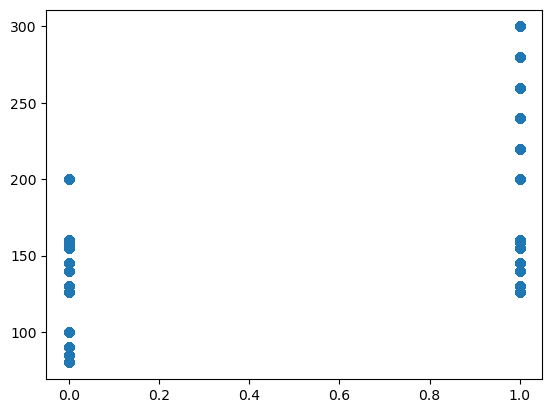

In [15]:
a=diabetes_hd_neg.column(8)
b=diabetes_hd_neg.column(7)
no_hd_graph=plt.scatter(a, b)
no_hd_graph

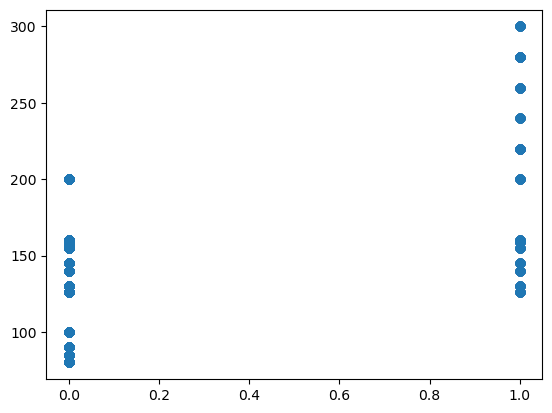

In [16]:
x=diabetes_hd.column(8)
y=diabetes_hd.column(7)
plt.scatter(x, y)

In [17]:
diabetes_hd_neg

gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
Female,54,0,0,No Info,27.32,6.6,80,0
Male,28,0,0,never,27.32,5.7,158,0
Female,36,0,0,current,23.45,5,155,0
Female,20,0,0,never,27.32,6.6,85,0
Female,44,0,0,never,19.31,6.5,200,1
Female,79,0,0,No Info,23.86,5.7,85,0
Male,42,0,0,never,33.64,4.8,145,0
Female,32,0,0,never,27.32,5,100,0
Female,53,0,0,never,27.32,6.1,85,0
Female,54,0,0,former,54.7,6,100,0


96,058 people without heart disease in study

In [18]:
diabetes_hd_neg.where("diabetes", are.equal_to(1))

gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
Female,44,0,0,never,19.31,6.5,200,1
Male,50,1,0,current,27.32,5.7,260,1
Male,73,0,0,former,25.91,9,160,1
Female,53,0,0,former,27.32,7,159,1
Male,50,0,0,former,37.16,9,159,1
Female,67,0,0,never,63.48,8.8,155,1
Male,57,0,0,No Info,27.32,8.2,126,1
Female,36,0,0,current,32.27,6.2,220,1
Female,60,0,0,never,27.32,7.5,300,1
Female,67,0,0,never,27.32,6.2,159,1


of 96,058 of people without heart disease, 7,233 have diabetes

In [19]:
diabetes_hd_neg.where("diabetes", are.equal_to(0))

gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
Female,54,0,0,No Info,27.32,6.6,80,0
Male,28,0,0,never,27.32,5.7,158,0
Female,36,0,0,current,23.45,5,155,0
Female,20,0,0,never,27.32,6.6,85,0
Female,79,0,0,No Info,23.86,5.7,85,0
Male,42,0,0,never,33.64,4.8,145,0
Female,32,0,0,never,27.32,5,100,0
Female,53,0,0,never,27.32,6.1,85,0
Female,54,0,0,former,54.7,6,100,0
Female,78,0,0,former,36.05,5,130,0


of 96,058 people without heart disease, 88,825 do not have diabetes

92.47% of people without heart disease do not have diabetes, and 7.53% of people without heart disease do have diabetes

In [20]:
diabetes_hd

gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
Female,80,0,1,never,25.19,6.6,140,0
Male,76,1,1,current,20.14,4.8,155,0
Female,72,0,1,former,27.94,6.5,130,0
Male,67,0,1,not current,27.32,6.5,200,1
Female,77,1,1,never,32.02,5,159,0
Female,59,0,1,ever,23.11,6.5,200,0
Male,68,1,1,current,27.32,5,126,0
Male,59,0,1,ever,30.85,5,126,0
Female,80,0,1,never,29.59,5.8,158,0
Male,57,1,1,not current,27.77,6.6,160,1


3942 people with heart disease in this study

In [21]:
diabetes_hd.where("diabetes", are.equal_to(1))

gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
Male,67,0,1,not current,27.32,6.5,200,1
Male,57,1,1,not current,27.77,6.6,160,1
Male,80,0,1,former,24.36,7.5,280,1
Male,75,0,1,not current,28.12,7.5,160,1
Male,69,0,1,former,24.1,6.8,126,1
Female,59,0,1,never,60.26,8.8,145,1
Male,80,0,1,former,32.95,6,130,1
Female,62,1,1,former,44.23,8.2,145,1
Female,62,1,1,never,43.16,8.8,280,1
Female,76,0,1,former,25.68,9,260,1


of 3942 people who do have heart disease, 1,267 have diabetes

In [22]:
diabetes_hd.where("diabetes", are.equal_to(0))

gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
Female,80,0,1,never,25.19,6.6,140,0
Male,76,1,1,current,20.14,4.8,155,0
Female,72,0,1,former,27.94,6.5,130,0
Female,77,1,1,never,32.02,5,159,0
Female,59,0,1,ever,23.11,6.5,200,0
Male,68,1,1,current,27.32,5,126,0
Male,59,0,1,ever,30.85,5,126,0
Female,80,0,1,never,29.59,5.8,158,0
Female,80,0,1,former,21.3,5,159,0
Male,80,0,1,No Info,32.37,6.6,80,0


of 3,942 people who have heart disease, 2,675 do not have diabetes

67.86% of people who have heart disease do not have diabetes, and 32.14% of people who have heart disease do have diabetes

heart disease positive = 32.14% chance to have diabetes

heart disease negative = 7.53% chance to have diabetes

In [23]:
diabetes_pos_hd_neg = diabetes_hd_neg.where("diabetes", are.equal_to(1))
diabetes_pos_hd_neg

gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
Female,44,0,0,never,19.31,6.5,200,1
Male,50,1,0,current,27.32,5.7,260,1
Male,73,0,0,former,25.91,9,160,1
Female,53,0,0,former,27.32,7,159,1
Male,50,0,0,former,37.16,9,159,1
Female,67,0,0,never,63.48,8.8,155,1
Male,57,0,0,No Info,27.32,8.2,126,1
Female,36,0,0,current,32.27,6.2,220,1
Female,60,0,0,never,27.32,7.5,300,1
Female,67,0,0,never,27.32,6.2,159,1


(array([ 88825.,   7233.]),
 array([ 0. ,  0.5,  1. ]),
 <BarContainer object of 2 artists>)

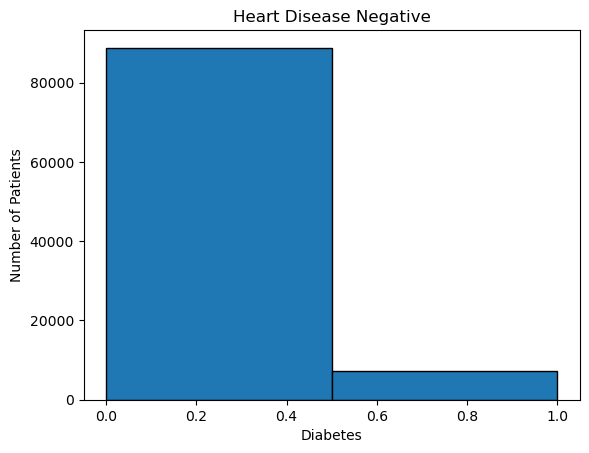

In [24]:
x = (diabetes_hd_neg.column(8))
plt.title("Heart Disease Negative")
plt.xlabel("Diabetes")
plt.ylabel("Number of Patients")
no_heart_disease_comp = plt.hist(x, bins=2)
no_heart_disease_comp

(array([ 2675.,  1267.]),
 array([ 0. ,  0.5,  1. ]),
 <BarContainer object of 2 artists>)

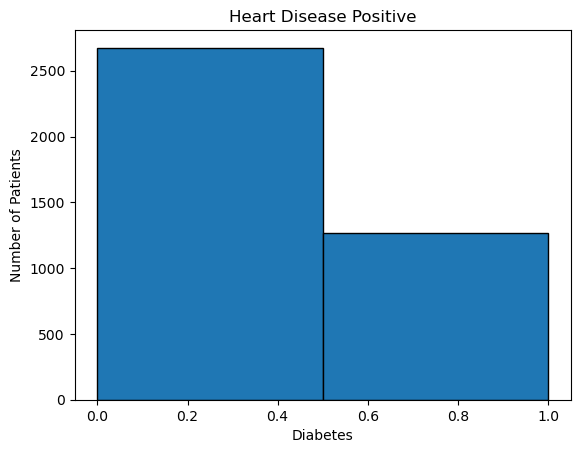

In [42]:
y = diabetes_hd.column(8)
plt.title("Heart Disease Positive")
plt.xlabel("Diabetes")
plt.ylabel("Number of Patients")
heart_disease_comp=plt.hist(y, bins=2)
heart_disease_comp


In [36]:
diabetes_pos_hd_pos = diabetes_hd.where("diabetes", are.equal_to(1))

In [ ]:
diabetes_pos_hd_pos

In [53]:
b=diabetes_pos_hd_pos

In [67]:
b=diabetes_pos_hd_pos.column(8).astype(int)
type(b)

numpy.ndarray

In [83]:
df=pd.read_csv('data/diabetes_prediction_dataset.csv')
df



<function matplotlib.pyplot.show(close=None, block=None)>

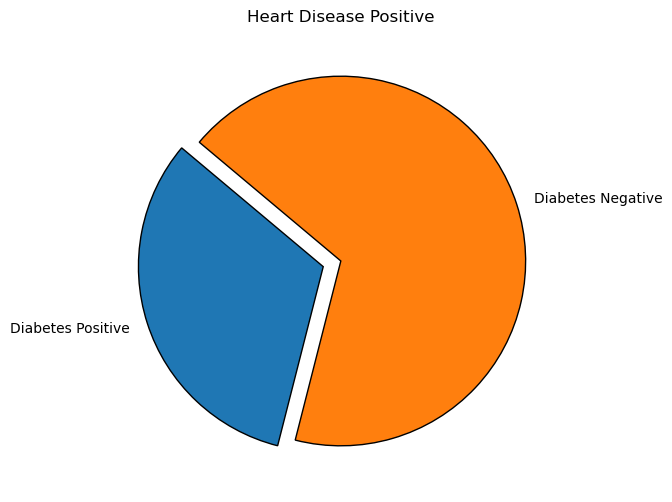

In [90]:
sizes = [1267, 2675]
labels = ["Diabetes Positive", "Diabetes Negative"]
plt.figure(figsize=(6,6))
explode = [0.1, 0]
plt.pie(sizes, labels=labels, explode=explode, startangle=140)
plt.title("Heart Disease Positive")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

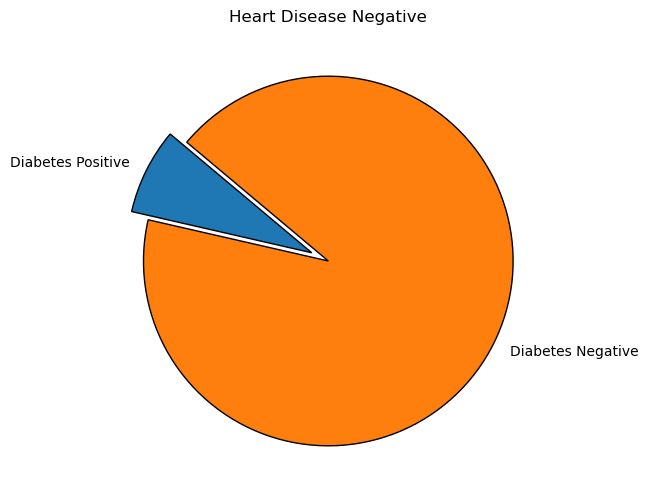

In [96]:
sizes = [7233, 88825]
labels = ["Diabetes Positive", "Diabetes Negative"]
plt.figure(figsize=(6,6))
explode = [0.1, 0]
plt.pie(sizes, labels=labels, explode=explode, startangle=140)
plt.title("Heart Disease Negative")
plt.show